## L-stable second order DIRK Scheme
### IMEX LRR(3,2,2) method (s,$\sigma$,p) = (3,2,2)

The explicit Butcher tableau is(with $s$ stages):

| $\hat{c}$ | $\hat{a}$   |          |           |           |
|-----------|-------------|----------|-----------|-----------|
| $0_1$     | $0_{11}$    | $0_{12}$ | $0_{13}$  | $0_{14}$  |
| $1/2_2$     | $1/2_{21}$    | $0_{22}$ | $0_{23}$  | $0_{24}$  |
| $1/3_1$     | $1/3_{31}$    | $0_{32}$ | $0_{33}$  | $0_{34}$  |
| $1_1$     | $0_{41}$    | $1_{42}$ | $0_{43}$  | $0_{44}$  |
| $\hat{b}$     | $0_{1}$    | $1_{2}$ | $0_{3}$  | $0_{4}$  |


And the implicit Butcher tableau which on padding results in the following ($\sigma = s+1$ stages):

| $c$ | $a$   |          |           |           |
|-----------|-------------|----------|-----------|-----------|
| $0_0$     | $0_{00}$    | $0_{01}$ | $0_{02}$  | $0_{03}$  |
| $1/2_1$     | $0_{10}$    | $1/2_{11}$ | $0_{12}$  | $0_{13}$  |
| $1/3_2$     | $0_{20}$    | $0_{21}$ | $1/3_{22}$  | $0_{23}$  |
| $1_3$     | $0_{30}$    | $0_{31}$ | $3/4_{32}$  | $1/4_{33}$  |
| $b$     | $0_{0}$    | $0_{1}$ | $3/4_{2}$  | $1/4_{3}$  |



For $i = 1,2,...s$, 

$\hat{k_{i+1}} = f(u_i)$ and  $\hat{K_{i+1}} = f(u_i)$,

where,

$$u_i = u_0 + h \sum_{j=1}^{i} a_{i,j} K_j + h h \sum_{j=1}^{i} \hat{a_{i,j}} \hat{K_j} $$

$$ \boxed{ u_1 = u_0 + \frac{h}{2}(g(u_1) + f(u_0), \\
 u_2 = u_0 + \frac{h}{3}(g(u_2) + f(u_0), \\
 u_3 = u_0 + \frac{h}{4}(3 g(u_2) + g(u_3) + 4 f(u_1)). }$$


Finally,

$$u_{n+1} = u_0 + h \sum_{j=1}^{s} b_j K_j + h h \sum_{j=1}^{\sigma} \hat{b_j} \hat{K_j}$$

For $s=3, \sigma = 2$,

$$\boxed {\Rightarrow u_{n+1} = u_0 + \frac{h}{4}(3 g(u_2) + g(u_3) + 4 f(u_1)).} $$


## System of two pendulums


We have a two pendulum system with spring constants $k_x$ and $k_y$ coupled together by a factor $q$:

$$ \frac{d^2 x(t)}{dt^2} = \ddot{x}(t)= -k_x x(t)$$
$$\ddot{y}(t) + q(\dot{y}(t) - \dot{x}(t)) + k_y y(t) = 0$$

decomposing into 1st order, coupled differential equation:

$$\dot{x} = v $$,
$$\dot{v} = -k_x x$$,
$$\dot{y} = v - q (y - x)$$,
$$\dot{w}  = -k_y y$$

which are then solved numerically with initial conditions:

$$x(t) \rightarrow x(0) = 1, \dot{x}(0) = 0$$,
$$y(t) \rightarrow y(0) = 1, \dot{y}(0) = 0$$


The analytical solutions to these equations with above mentioned initial conditions are:

$$x(t) = \cos{\left(\sqrt{k_x}t\right)}$$,
$$y(t) = \frac{1}{(k_x-k_y)^2+k_x q^2} \left[ q \left(\frac{\left(k_y^2-k_x^2\right) e^{-\frac{1}{2} (q t)} \sinh \left(\frac{1}{2} t \sqrt{q^2-4 k_y}\right)}{\sqrt{q^2-4 k_y}} + \\ \sqrt{k_x} (k_x-k_y) \sin \left(\sqrt{k_x} t\right)+k_x q \cos \left(\sqrt{k_x} t\right)\right)+(k_x-k_y)^2 e^{-\frac{1}{2} (q t)} \cosh \left(\frac{1}{2} t \sqrt{q^2-4 k_y}\right) \right]$$


For $y(t)$ to be a real valued function, the condition to be satisfied is:

$$\left(q^2 - 4 k_y\right) \geq 0$$

## Solving system of two pendulums with midpoint IMEX method - (1,2,2)

Consider the state vector $u$ as system o differential variables:

$$u = 
\begin{pmatrix}
x \\
v \\
w \\
y
\end{pmatrix}$$

with,
$$f(u) = \begin{pmatrix}
v \\
-k_x x \\
-k_y y \\
w
\end{pmatrix} \ \text{and} \ g(u) = \begin{pmatrix}
0 \\
0 \\
0 \\
-q(y - x)
\end{pmatrix}$$

In [1]:
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt

In [2]:
#LRR(3,2,2) IMEX method

x0,v0,w0,y0 = sp.symbols("x_0 v_0 w_0 y_0")
x1,v1,w1,y1 = sp.symbols("x_1 v_1 w_1 y_1")
x2,v2,w2,y2 = sp.symbols("x_2 v_2 w_2 y_2")
x3,v3,w3,y3 = sp.symbols("x_3 v_3 w_3 y_3")
kx,ky,q,h = sp.symbols("k_x k_y q h")
x_np1,v_np1,w_np1,y_np1 = sp.symbols("x_{n+1} v_{n+1} w_{n+1} y_{n+1}")

u0 = [x0,v0,w0,y0]
u1 = [x1,v1,w1,y1]
u2 = [x2,v2,w2,y2]
u3 = [x3,v3,w3,y3]

def func_fu(u):
    x,v,w,y = u[0],u[1],u[2],u[3]
    xdot = v
    vdot = -kx*x
    ydot = w
    wdot = -ky*y
    udot = [xdot,vdot,wdot,ydot]
    return udot

def func_gu(u):
    x,v,w,y = u[0],u[1],u[2],u[3]
    xdot = 0
    vdot = 0
    ydot = -q*(y - x)
    wdot = 0
    udot = [xdot,vdot,wdot,ydot]
    return udot

u1_eq = [np.nan,np.nan,np.nan,np.nan]
u2_eq = [np.nan,np.nan,np.nan,np.nan]
u3_eq = [np.nan,np.nan,np.nan,np.nan]
u_np1 = [np.nan,np.nan,np.nan,np.nan]

for i in range (len(u_np1)):
    u1_eq[i] = -u1[i] + u0[i] + (h/2)*(func_gu(u1)[i] + func_fu(u0)[i])
    u2_eq[i] = -u2[i] + u0[i] + (h/3)*(func_gu(u2)[i] + func_fu(u0)[i])
    u3_eq[i] = -u3[i] + u0[i] + (h/4)*(3*func_gu(u2)[i] + func_gu(u3)[i]) + h*(func_fu(u1)[i])

u_sol = sp.linsolve([u1_eq[0],u2_eq[0],u3_eq[0],u1_eq[1],u2_eq[1],u3_eq[1],
                  u1_eq[2],u2_eq[2],u3_eq[2],u1_eq[3],u2_eq[3],u3_eq[3]],
                 (x1,v1,w1,y1,x2,v2,w2,y2,x3,v3,w3,y3))
u1_sol = [u_sol.args[0][0],u_sol.args[0][1],u_sol.args[0][2],u_sol.args[0][3]]
u2_sol = [u_sol.args[0][4],u_sol.args[0][5],u_sol.args[0][6],u_sol.args[0][7]]
u3_sol = [u_sol.args[0][8],u_sol.args[0][9],u_sol.args[0][10],u_sol.args[0][11]]

for i in range (len(u_np1)):
    u_np1[i] = u0[i] + (h/4)*(3*func_gu(u2_sol)[i] + func_gu(u3_sol)[i]) + h*(func_fu(u1_sol)[i])
    
x_imex = lambdify([x0,v0,w0,y0,kx,ky,q,h],u_np1[0])
v_imex = lambdify([x0,v0,w0,y0,kx,ky,q,h],u_np1[1])
w_imex = lambdify([x0,v0,w0,y0,kx,ky,q,h],u_np1[2])
y_imex = lambdify([x0,v0,w0,y0,kx,ky,q,h],u_np1[3])

In [3]:
kx_n = 10 #Pendulum 1 spring constant
ky_n = 1.1 #Pendulum 2 spring constant
#NOTE: analytical solution can't calculated for q=0, this code is incapable!!
q_n = 750.0 #Coupling factor 

#Note!! If initial data is to be changed, compute analytical solution
#in Mathematica with respective initial data and make changes to analytic solution defined here.
#------DO NOT CHANGE THIS------------------
x_0 = 1 # initial position - pendulum 1
v_0 = 0 # initial velocity - pendulum 1
y_0 = 1 # initial position - pendulum 2
w_0 = 0 # initial velocity - pendulum 2
#-----------------------------------------

#check if determinant > 0
if (q_n**2 < 4*ky_n):
    print("Discriminant \sqrt{q^2 - 4k2} < 0. Increase the value of 'q'")
else:
    print("Discriminant condition satisfied")

Discriminant condition satisfied


In [4]:
#Initial data
h_list = ([0.1,0.01])
t_start = 0
t_end = 30

#--------------------------------------------------------------------
N = int((t_end)/np.min(h_list))
X = np.empty((N,len(h_list)))
X [:] = np.nan
V = np.empty((N,len(h_list)))
V [:] = np.nan
Y = np.empty((N,len(h_list)))
Y[:] = np.nan
W = np.empty((N,len(h_list)))
W[:] = np.nan
T=np.empty((N,len(h_list)))
T[:] = np.nan

X_a = np.zeros((N,len(h_list)))
X_a = np.float128(X_a)
delX = np.zeros((N,len(h_list)))
delX = np.float128(delX)
Y_a = np.zeros((N,len(h_list)))
Y_a = np.float128(Y_a)
delY = np.zeros((N,len(h_list)))
delY = np.float128(delY)

diff_k1k2 = kx_n - ky_n
detm = np.sqrt(q_n**2 - 4*ky_n,dtype='float128')
def y_analytic(time):
    y = np.float128
    y =  ( ( q_n*( ((np.exp(-0.5*q_n*time)*np.sinh(0.5*time*detm)*(ky_n**2 - kx_n**2))/detm) 
         + (np.sqrt(kx_n)*np.sin(np.sqrt(kx_n)*time)*diff_k1k2)
         + (kx_n*q_n*np.cos(np.sqrt(kx_n)*time))) 
         + (np.exp(-0.5*q_n*time)*np.cosh(0.5*time*detm)*(diff_k1k2)**2) ) / ((diff_k1k2**2) + kx_n*q_n**2) )
    return y

def x_analytic(time):
    x = np.cos(np.sqrt(kx_n)*time)
    return x

In [5]:
#loop to calculate numerical(IMEX) and analytical solution 
for i in range (len(h_list)):
    for j in range (int((t_end)/h_list[i])-1):
        if(j==0):
            t = np.arange(t_start,t_end,h_list[i]) # (initial time, final time, time step size)
            X[j,i] = x_0
            V[j,i] = v_0
            W[j,i] = w_0
            Y[j,i] = y_0
        X[j+1,i] = x_imex(X[j,i],V[j,i],W[j,i],Y[j,i],kx_n,ky_n,q_n,h_list[i])
        V[j+1,i] = v_imex(X[j,i],V[j,i],W[j,i],Y[j,i],kx_n,ky_n,q_n,h_list[i])
        W[j+1,i] = w_imex(X[j,i],V[j,i],W[j,i],Y[j,i],kx_n,ky_n,q_n,h_list[i])
        Y[j+1,i] = y_imex(X[j,i],V[j,i],W[j,i],Y[j,i],kx_n,ky_n,q_n,h_list[i])
        T[j,i] = t[j]
        # Calculating analytical solution for array of time - t:
        X_a[j,i] = x_analytic(T[j,i])
        Y_a[j,i] = y_analytic(T[j,i])
        #Error calculation:
        delX[j,i] = np.abs((X_a[j,i]-X[j,i])/h_list[i]**2)
        delY[j,i] = np.abs((Y_a[j,i]-Y[j,i])/h_list[i]**2)

In [6]:
#Explicit RK2 method

def RHS(x,v,w,y):
    xdot = v
    vdot = -kx_n*x
    ydot = w - q_n*(y - x)
    wdot = -ky_n*y
    return xdot,vdot,wdot,ydot

def RK2(x,v,w,y,h):
    k1x, k1v, k1w, k1y = RHS(x,v,w,y)
    k2x, k2v, k2w, k2y = RHS(x+h/2*k1x, v+h/2*k1v, w+h/2*k1w, y+h/2*k1y)
    x_np1 = x + h*k2x
    v_np1 = v + h*k2v
    w_np1 = w + h*k2w
    y_np1 = y + h*k2y
    return x_np1, v_np1, w_np1, y_np1

X_rk2 = np.empty((N,len(h_list)))
X_rk2[:] = np.nan
V_rk2 = np.empty((N,len(h_list)))
V_rk2[:] = np.nan
Y_rk2 = np.empty((N,len(h_list)))
Y_rk2[:] = np.nan
W_rk2 = np.empty((N,len(h_list)))
W_rk2[:] = np.nan

delX_rk2 = np.zeros((N,len(h_list)))
delY_rk2 = np.zeros((N,len(h_list)))
delX_rk2 = np.float128(delX_rk2)
delX_rk2 = np.float128(delX_rk2)

for i in range (len(h_list)):
    for j in range (int((t_end)/h_list[i])-1):
        if(j==0):
            t = np.arange(t_start,t_end,h_list[i]) # (initial time, final time, time step size)
            X_rk2[j,i] = x_0
            V_rk2[j,i] = v_0
            W_rk2[j,i] = w_0
            Y_rk2[j,i] = y_0
        X_rk2[j+1,i],V_rk2[j+1,i],W_rk2[j+1,i],Y_rk2[j+1,i] = RK2(X_rk2[j,i],V_rk2[j,i],
                                                                  W_rk2[j,i],Y_rk2[j,i],h_list[i])
        #Error calculation:
        delX_rk2[j,i] = np.abs((X_a[j,i]-X_rk2[j,i])/h_list[i]**2)
        delY_rk2[j,i] = np.abs((Y_a[j,i]-Y_rk2[j,i])/h_list[i]**2)

<ipython-input-6-ea0e76875b8d>:6: RuntimeWarning: overflow encountered in double_scalars
  ydot = w - q_n*(y - x)
<ipython-input-6-ea0e76875b8d>:12: RuntimeWarning: invalid value encountered in double_scalars
  k2x, k2v, k2w, k2y = RHS(x+h/2*k1x, v+h/2*k1v, w+h/2*k1w, y+h/2*k1y)
<ipython-input-6-ea0e76875b8d>:6: RuntimeWarning: invalid value encountered in double_scalars
  ydot = w - q_n*(y - x)


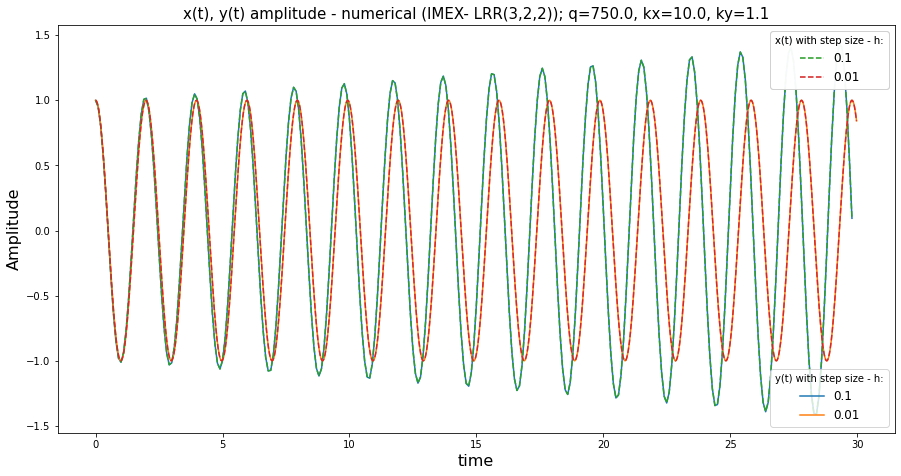

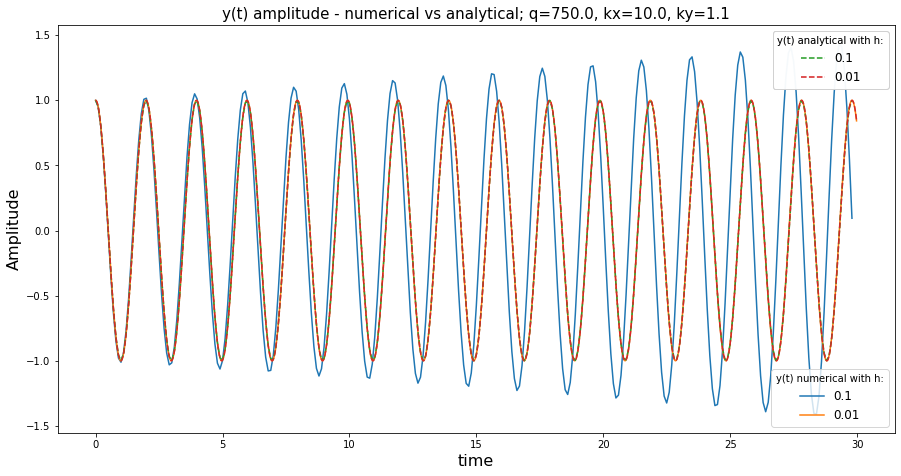

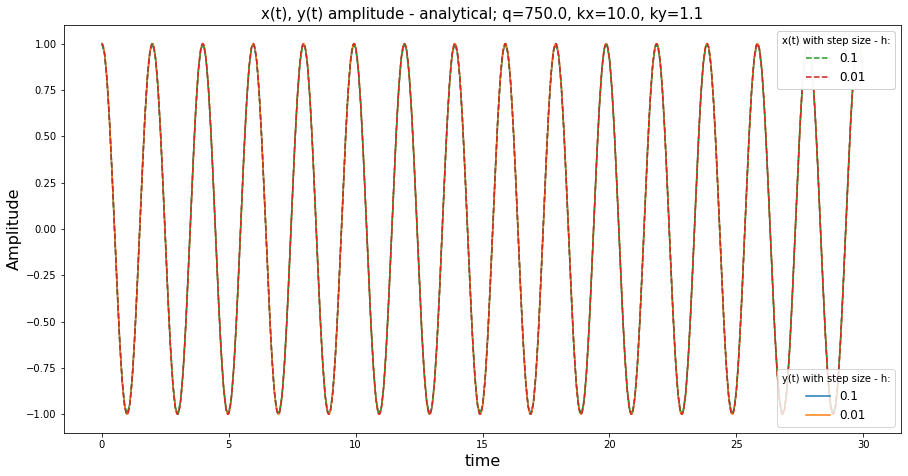

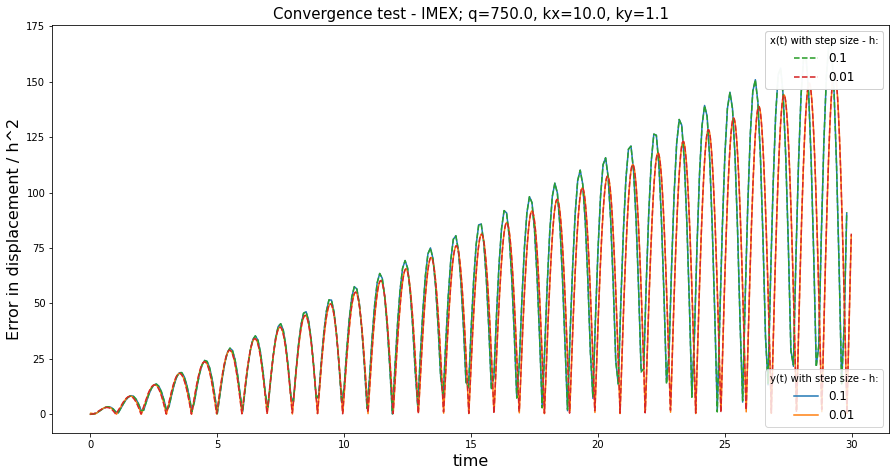

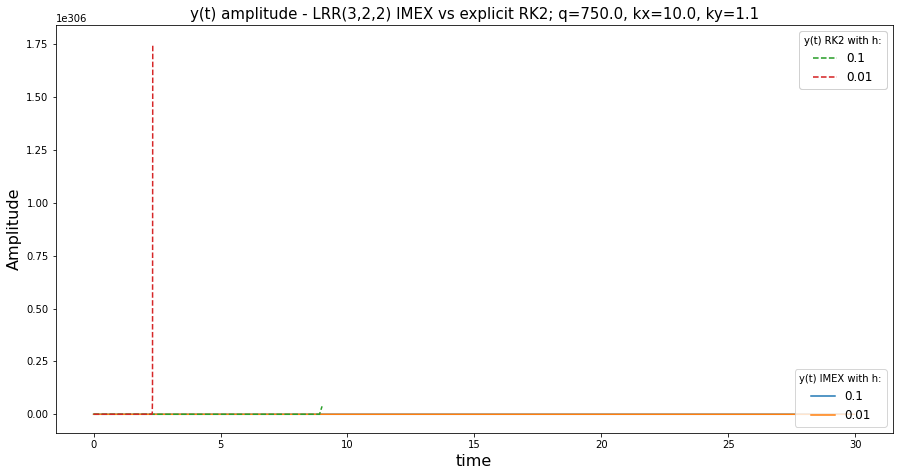

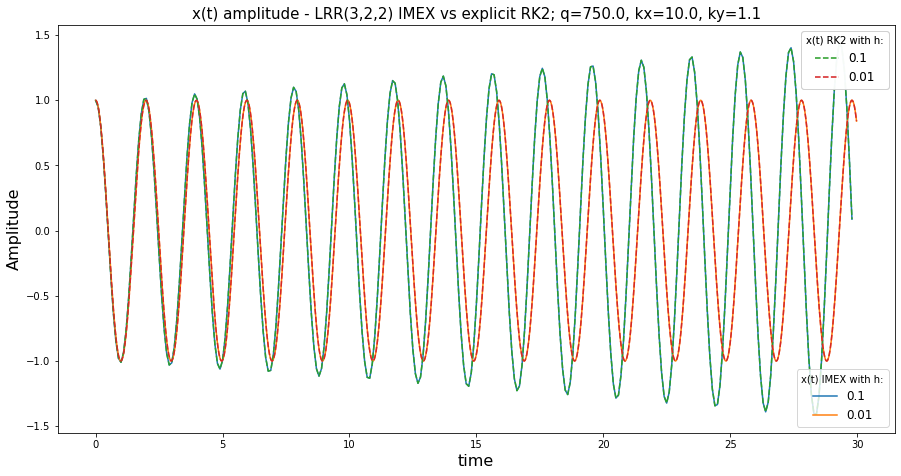

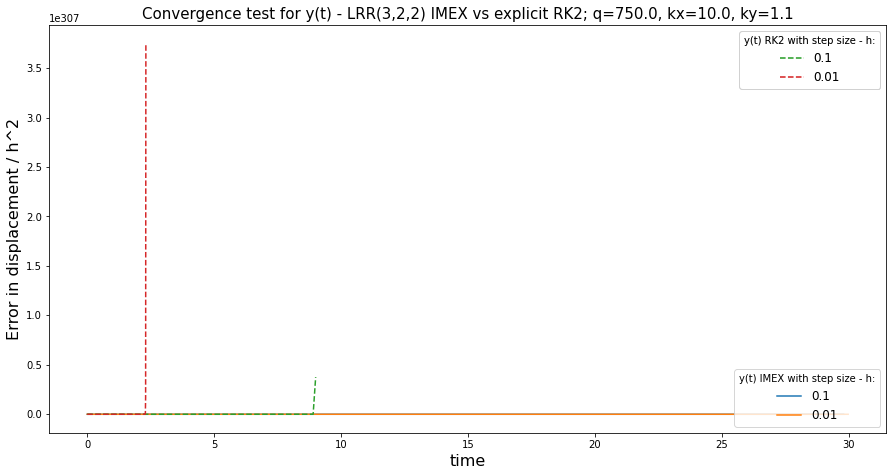

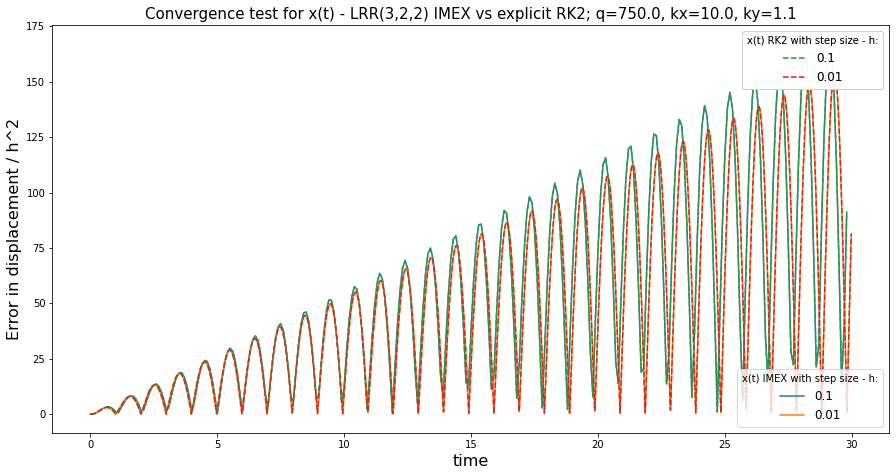

In [7]:
def plots(title,x_label,y_label,l1_title,l2_title,x_param,y_param1,y_param2):
    plt.figure(figsize=(15,7.5))
    plt.title(title,fontsize=15)
    plt.xlabel(x_label,fontsize=16)
    plt.ylabel(y_label,fontsize=16)
    l1 = plt.plot(x_param,y_param1)
    l2 = plt.plot(x_param,y_param2,linestyle='--')
    leg1 = plt.legend(l1,h_list,title=l1_title,fontsize=12,loc =4)
    plt.gca().add_artist(leg1)
    leg2 = plt.legend(l2,h_list,title=l2_title,fontsize=12,loc =1)
    plt.gca().add_artist(leg2)
    plt.show()

#plots for IMEX vs analytical solution
plots("x(t), y(t) amplitude - numerical (IMEX- LRR(3,2,2)); q=%0.1f, kx=%0.1f, ky=%0.1f"%(q_n,kx_n,ky_n),
      "time","Amplitude","y(t) with step size - h:","x(t) with step size - h:",T,Y,X)
plots("y(t) amplitude - numerical vs analytical; q=%0.1f, kx=%0.1f, ky=%0.1f"%(q_n,kx_n,ky_n),
      "time","Amplitude","y(t) numerical with h:","y(t) analytical with h:",T,Y,Y_a)
plots("x(t), y(t) amplitude - analytical; q=%0.1f, kx=%0.1f, ky=%0.1f"%(q_n,kx_n,ky_n),
      "time","Amplitude","y(t) with step size - h:","x(t) with step size - h:",T,Y_a,X_a)
plots("Convergence test - IMEX; q=%0.1f, kx=%0.1f, ky=%0.1f"%(q_n,kx_n,ky_n),
      "time","Error in displacement / h^2","y(t) with step size - h:",
      "x(t) with step size - h:",T,delY,delX)

#plots for IMEX vs explicit RK2
plots("y(t) amplitude - LRR(3,2,2) IMEX vs explicit RK2; q=%0.1f, kx=%0.1f, ky=%0.1f"%(q_n,kx_n,ky_n),
      "time","Amplitude","y(t) IMEX with h:","y(t) RK2 with h:",T,Y,Y_rk2)
plots("x(t) amplitude - LRR(3,2,2) IMEX vs explicit RK2; q=%0.1f, kx=%0.1f, ky=%0.1f"%(q_n,kx_n,ky_n),
      "time","Amplitude","x(t) IMEX with h:","x(t) RK2 with h:",T,X,X_rk2)
plots("Convergence test for y(t) - LRR(3,2,2) IMEX vs explicit RK2; q=%0.1f, kx=%0.1f, ky=%0.1f"%(q_n,kx_n,ky_n),
      "time","Error in displacement / h^2","y(t) IMEX with step size - h:",
      "y(t) RK2 with step size - h:",T,delY,delY_rk2)
plots("Convergence test for x(t) - LRR(3,2,2) IMEX vs explicit RK2; q=%0.1f, kx=%0.1f, ky=%0.1f"%(q_n,kx_n,ky_n),
      "time","Error in displacement / h^2","x(t) IMEX with step size - h:",
      "x(t) RK2 with step size - h:",T,delX,delX_rk2)